### Insurance Cost Analysis

### Importing Required Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Download the dataset and convert to Data Frame

In [25]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"
filename = "Insurance.csv"
response = requests.get(URL)
with open(filename,"wb") as f:
    f.write(response.content)

In [27]:
df = pd.read_csv(filename,header=0)

In [45]:
df1=df
df1.head(10)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


### Adding headers to columns

In [33]:
headers = ["Age","Gender","BMI","No_of_children","Smoker","Region","Charges"]
df.columns=headers

## Data Wrangling

### Finding the missing Values and replacing witg NAN

In [53]:
df.replace("?",np.nan,inplace=True)
df.head(10)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [55]:
missing_data = df.isnull()
missing_data.head(7)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False


In [117]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(1))
    print("")      
    

Age
Age
False    0.998556
True     0.001444
Name: proportion, dtype: float64

Gender
Gender
False    1.0
Name: proportion, dtype: float64

BMI
BMI
False    1.0
Name: proportion, dtype: float64

No_of_children
No_of_children
False    1.0
Name: proportion, dtype: float64

Smoker
Smoker
False    0.997474
True     0.002526
Name: proportion, dtype: float64

Region
Region
False    1.0
Name: proportion, dtype: float64

Charges
Charges
False    1.0
Name: proportion, dtype: float64



In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


### Handling the Missing Values

In [77]:
df["Age"] = df["Age"].astype(float)
mean=df["Age"].mean()
mean

39.11709432598482

In [87]:
most = df["Smoker"].value_counts().idxmax()
most

'0'

In [95]:
df['Smoker'].replace(np.nan,most,inplace = True)
df.head(10)

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_34884\1708111207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoker'].replace(np.nan,most,inplace = True)


,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18.0,2,33.770,1,0,4,1725.55230
1,28.0,2,33.000,3,0,4,4449.46200
2,33.0,2,22.705,0,0,1,21984.47061
3,32.0,2,28.880,0,0,1,3866.85520
4,31.0,1,25.740,0,0,4,3756.62160
5,46.0,1,33.440,1,0,4,8240.58960
6,37.0,1,27.740,3,0,1,7281.50560
7,37.0,2,29.830,2,0,2,6406.41070
8,60.0,1,25.840,0,0,1,28923.13692
9,25.0,2,26.220,0,0,2,2721.32080


In [143]:
df['Age'].replace(np.nan,mean,inplace=True)

In [151]:
df.dtypes

Age                 int32
Gender              int64
BMI               float64
No_of_children      int64
Smoker              int32
Region              int64
Charges           float64
dtype: object

In [147]:
nan_in_age = df[df['Smoker'].isna()]
nan_in_age

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges


In [149]:
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype(int)

In [153]:
df[["Charges"]] = df[["Charges"]].round(2)

In [155]:
df[["Charges"]].head()

,Charges
0,1725.55
1,4449.46
2,21984.47
3,3866.86
4,3756.62


## Exploratory Data Analysis (EDA)

#### Implement the regression plot for charges with respect to bmi.

(0.0, 66902.85800000001)

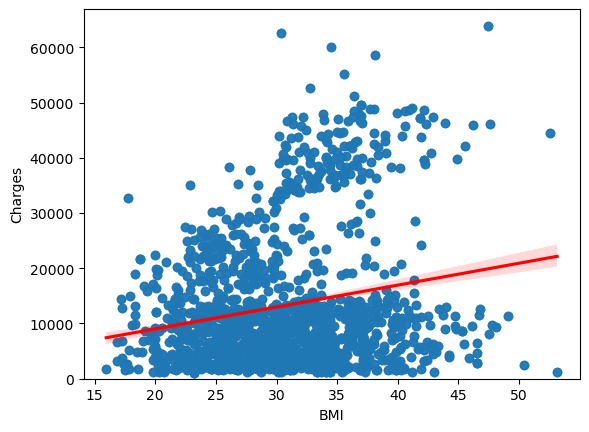

In [165]:
sns.regplot(data = df,x = 'BMI',y ='Charges',line_kws={'color':'Red'})
plt.ylim(0,)

#### Implement the box plot for charges with respect to smoker

<Axes: xlabel='Smoker', ylabel='Charges'>

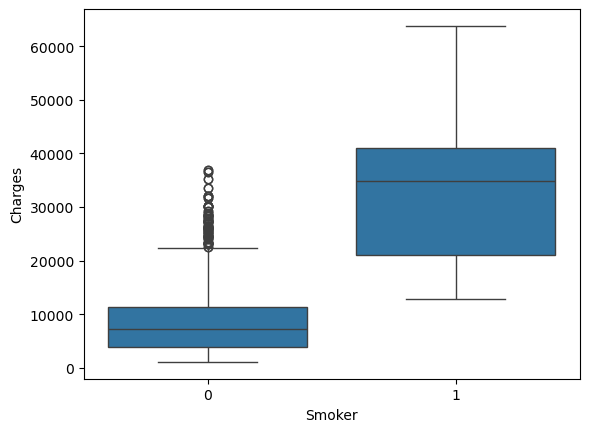

In [167]:
sns.boxplot(data=df,x='Smoker',y='Charges')

In [171]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


## Model Development

#### Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset.Find R^2

In [177]:
lm=LinearRegression()
lm

LinearRegression()

In [179]:
X=df[['Smoker']]
Y=df[['Charges']]
lm.fit(X,Y)

LinearRegression()

In [183]:
lm.score(X,Y)

0.6227430402464125

#### Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the score of this model

In [185]:
X1=df[["Age","Gender","BMI","No_of_children","Smoker","Region"]]
lm1=LinearRegression()
lm1.fit(X1,Y)
print(lm1.score(X1,Y))


0.7505888664568174


#### Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [187]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
X1 = X1.astype(float)
pipe.fit(X1,Y)
ypipe=pipe.predict(X1)
print(r2_score(Y,ypipe))

0.8453719231080021


## Model Refinement
#### Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [225]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,test_size=0.2,random_state=1)
Y_train.shape

(2216, 1)

#### Initialize a Ridge regressor that used hyperparameter .Fit the model using training data data subset. Print the score for the testing data.

In [233]:
reg=Ridge(alpha=0.1)
reg.fit(X_train,Y_train)
yhat=reg.predict(X_test)
print(r2_score(Y_test,yhat))

0.7254198858412229


#### Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the score for the testing subset.

In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
reg.fit(X_train_pr,Y_train)
yhat=reg.predict(X_test_pr)
print(r2_score(Y_test,yhat))